# LIAB's exploratory data analysis

Inspired by Fred Navursoz's Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Read Data

In [2]:
aisles = pd.read_csv('./data/aisles.csv')
departments = pd.read_csv('./data/departments.csv')
order_products_prior = pd.read_csv('./data/order_products__prior.csv')
order_products_train = pd.read_csv('./data/order_products__train.csv')
orders = pd.read_csv('./data/orders.csv')
products = pd.read_csv('./data/products.csv')
sample_submission = pd.read_csv('./data/sample_submission.csv')

## Product / department previews

In [3]:
# aisles.csv
print('Total: {}'.format(aisles.shape[0]))
aisles.head()

Total: 134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


# departments.csv
print('Total: {}'.format(departments.shape[0]))
departments.head()

In [4]:
# departments.csv
print('Total: {}'.format(products.shape[0]))
products.head()

Total: 49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# Group together product related information into new DataFrame labeled 'goods'

In [5]:
goods = pd.merge(left=pd.merge(left=products, right=departments, how='left'), right=aisles, how='left')
# Make product names more pythonic ;)
goods.product_name = goods.product_name.str.replace(' ', '_').str.lower()
goods.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,chocolate_sandwich_cookies,61,19,snacks,cookies cakes
1,2,all-seasons_salt,104,13,pantry,spices seasonings
2,3,robust_golden_unsweetened_oolong_tea,94,7,beverages,tea
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1,frozen,frozen meals
4,5,green_chile_anytime_sauce,5,13,pantry,marinades meat preparation


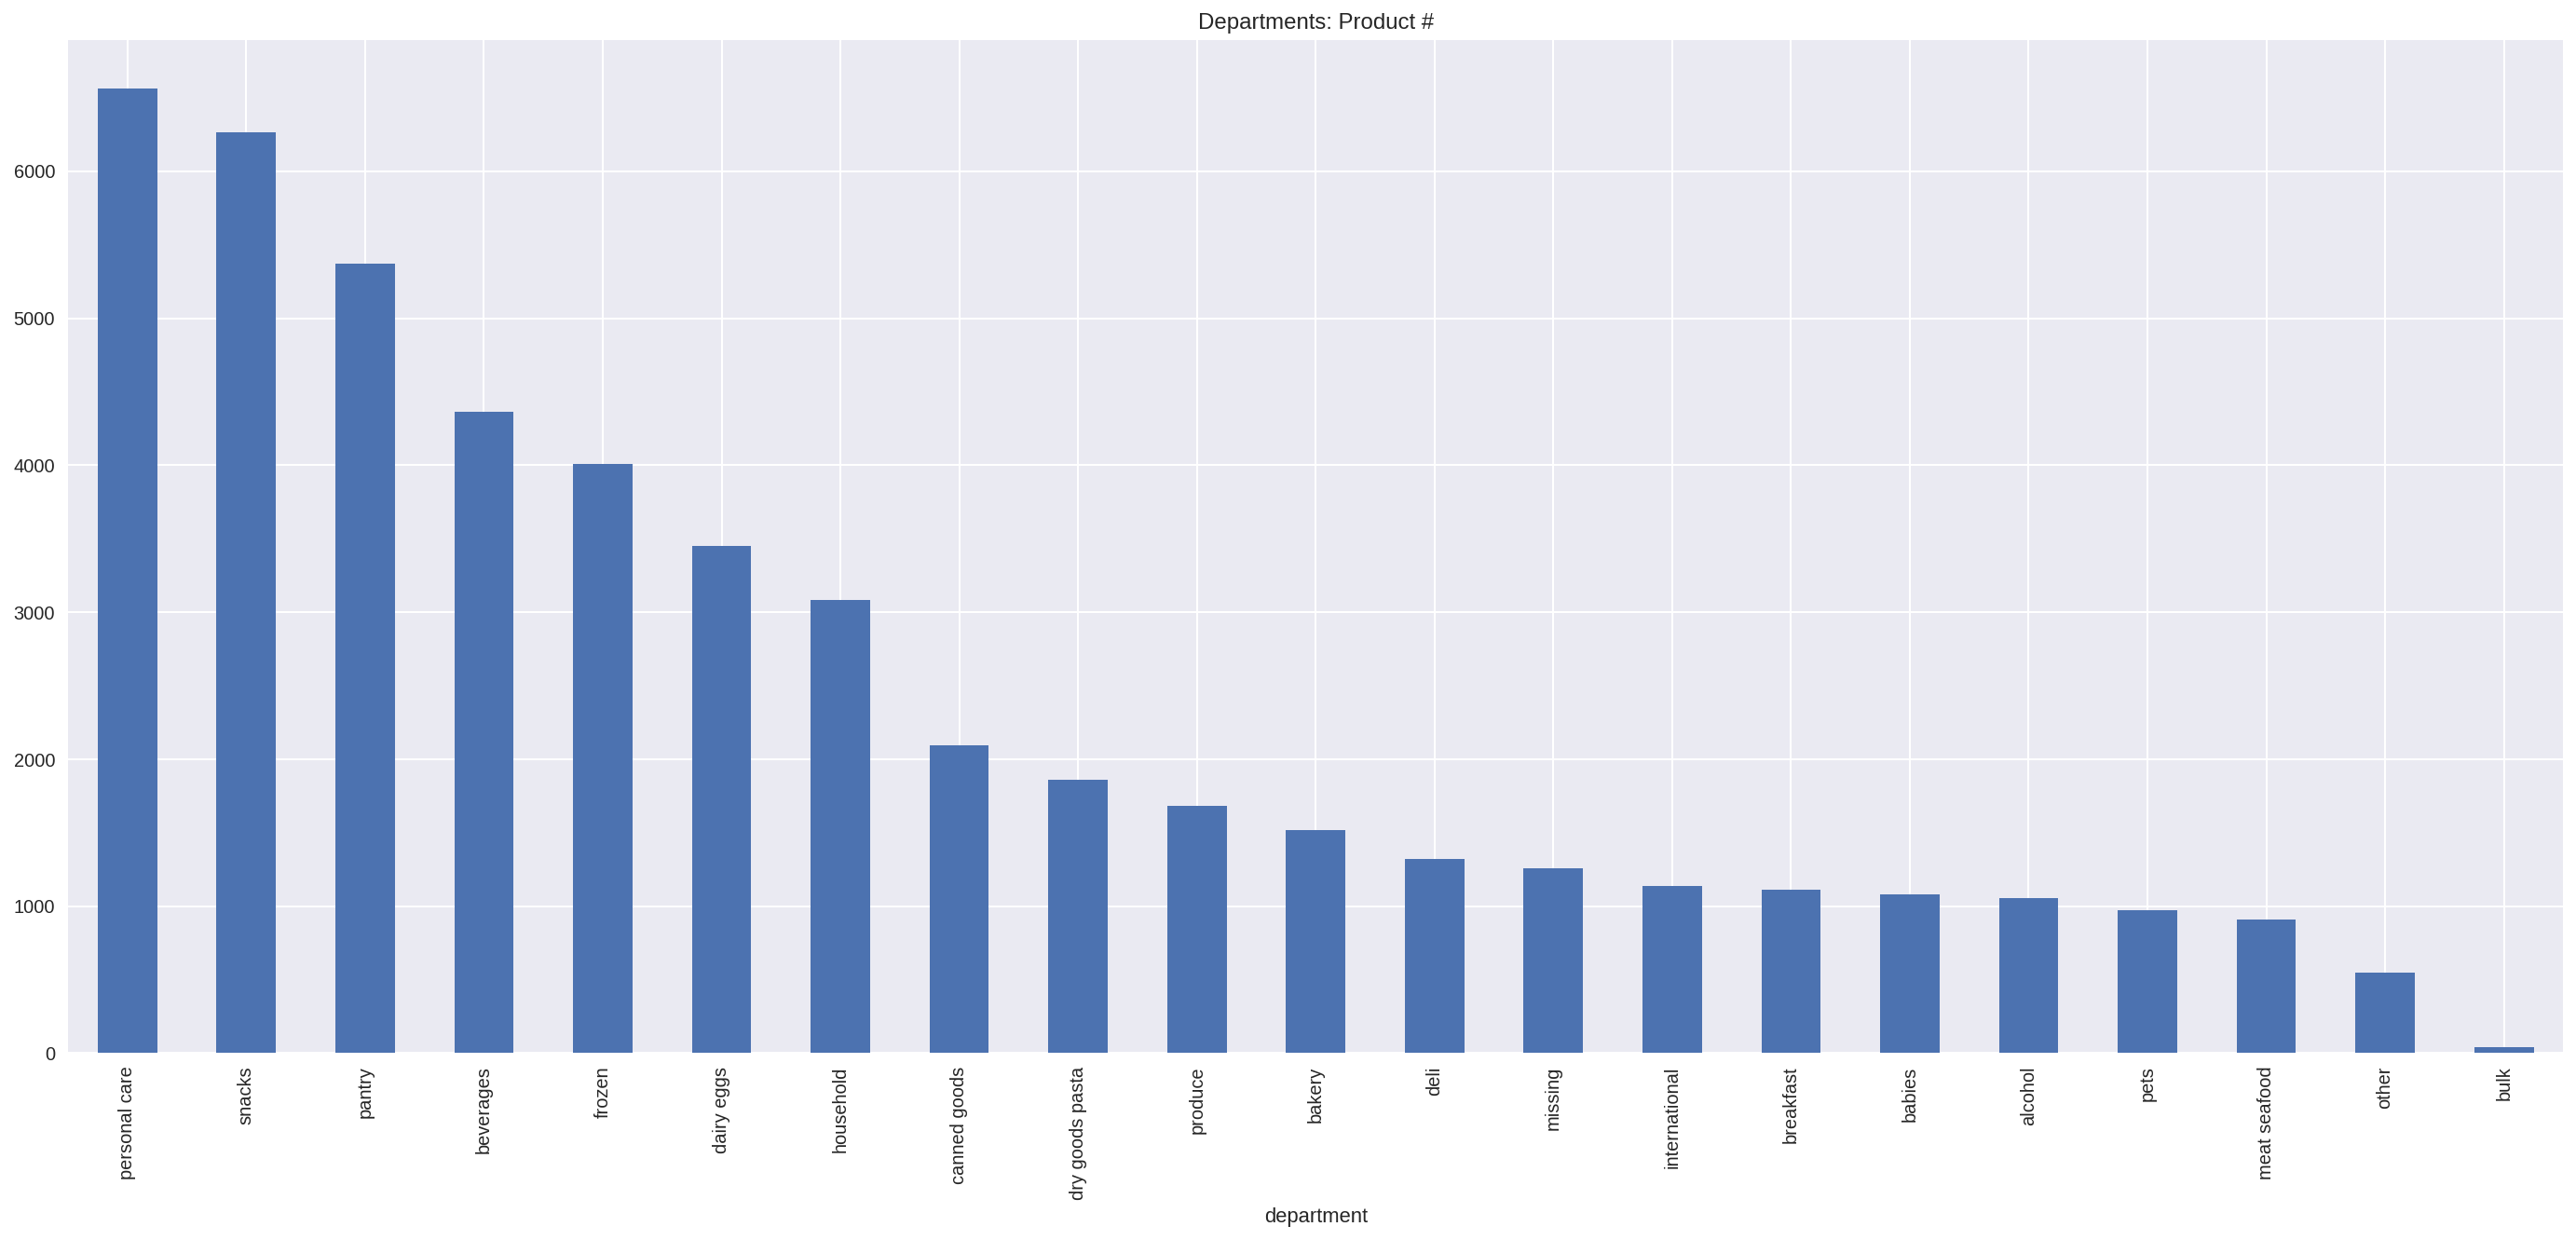

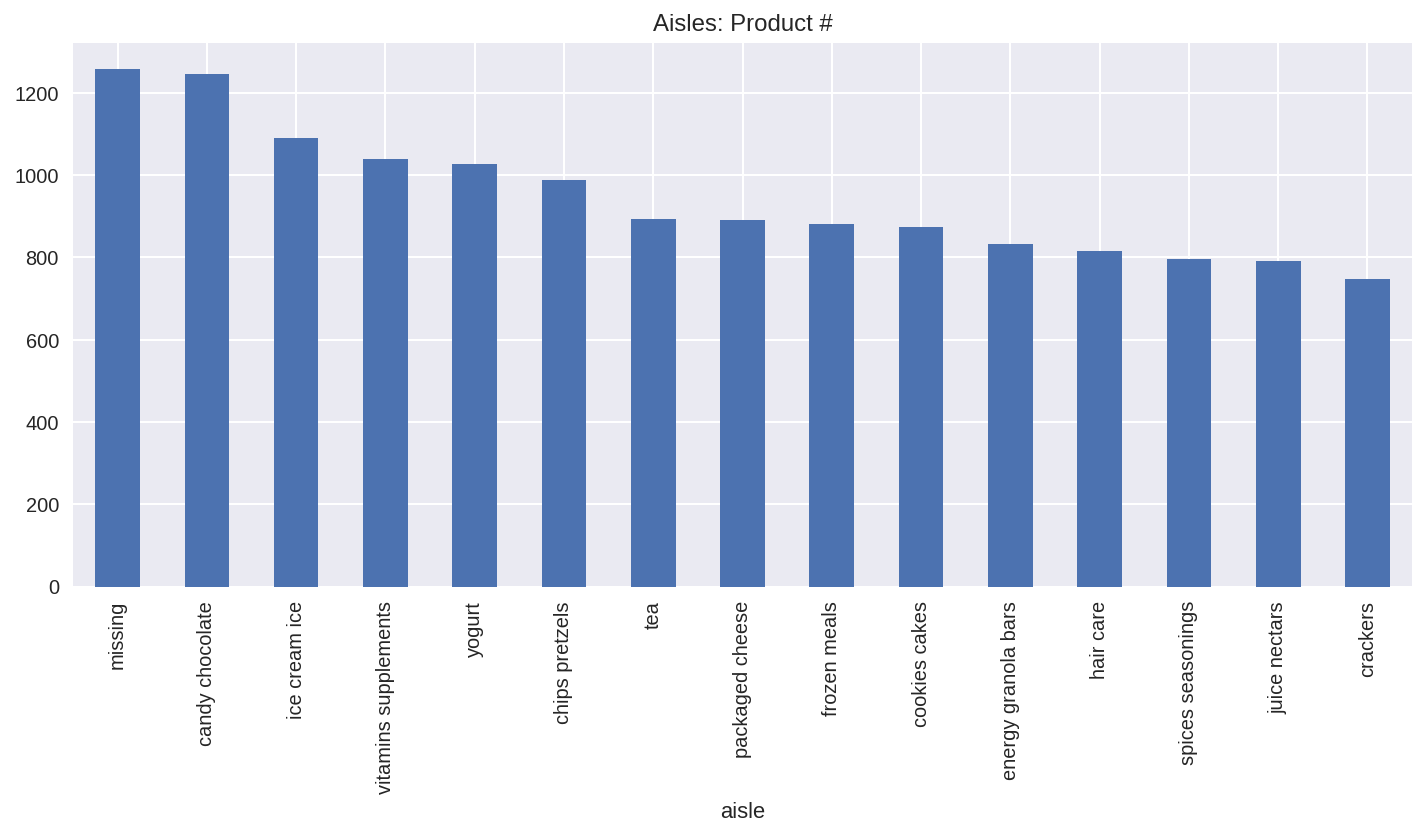

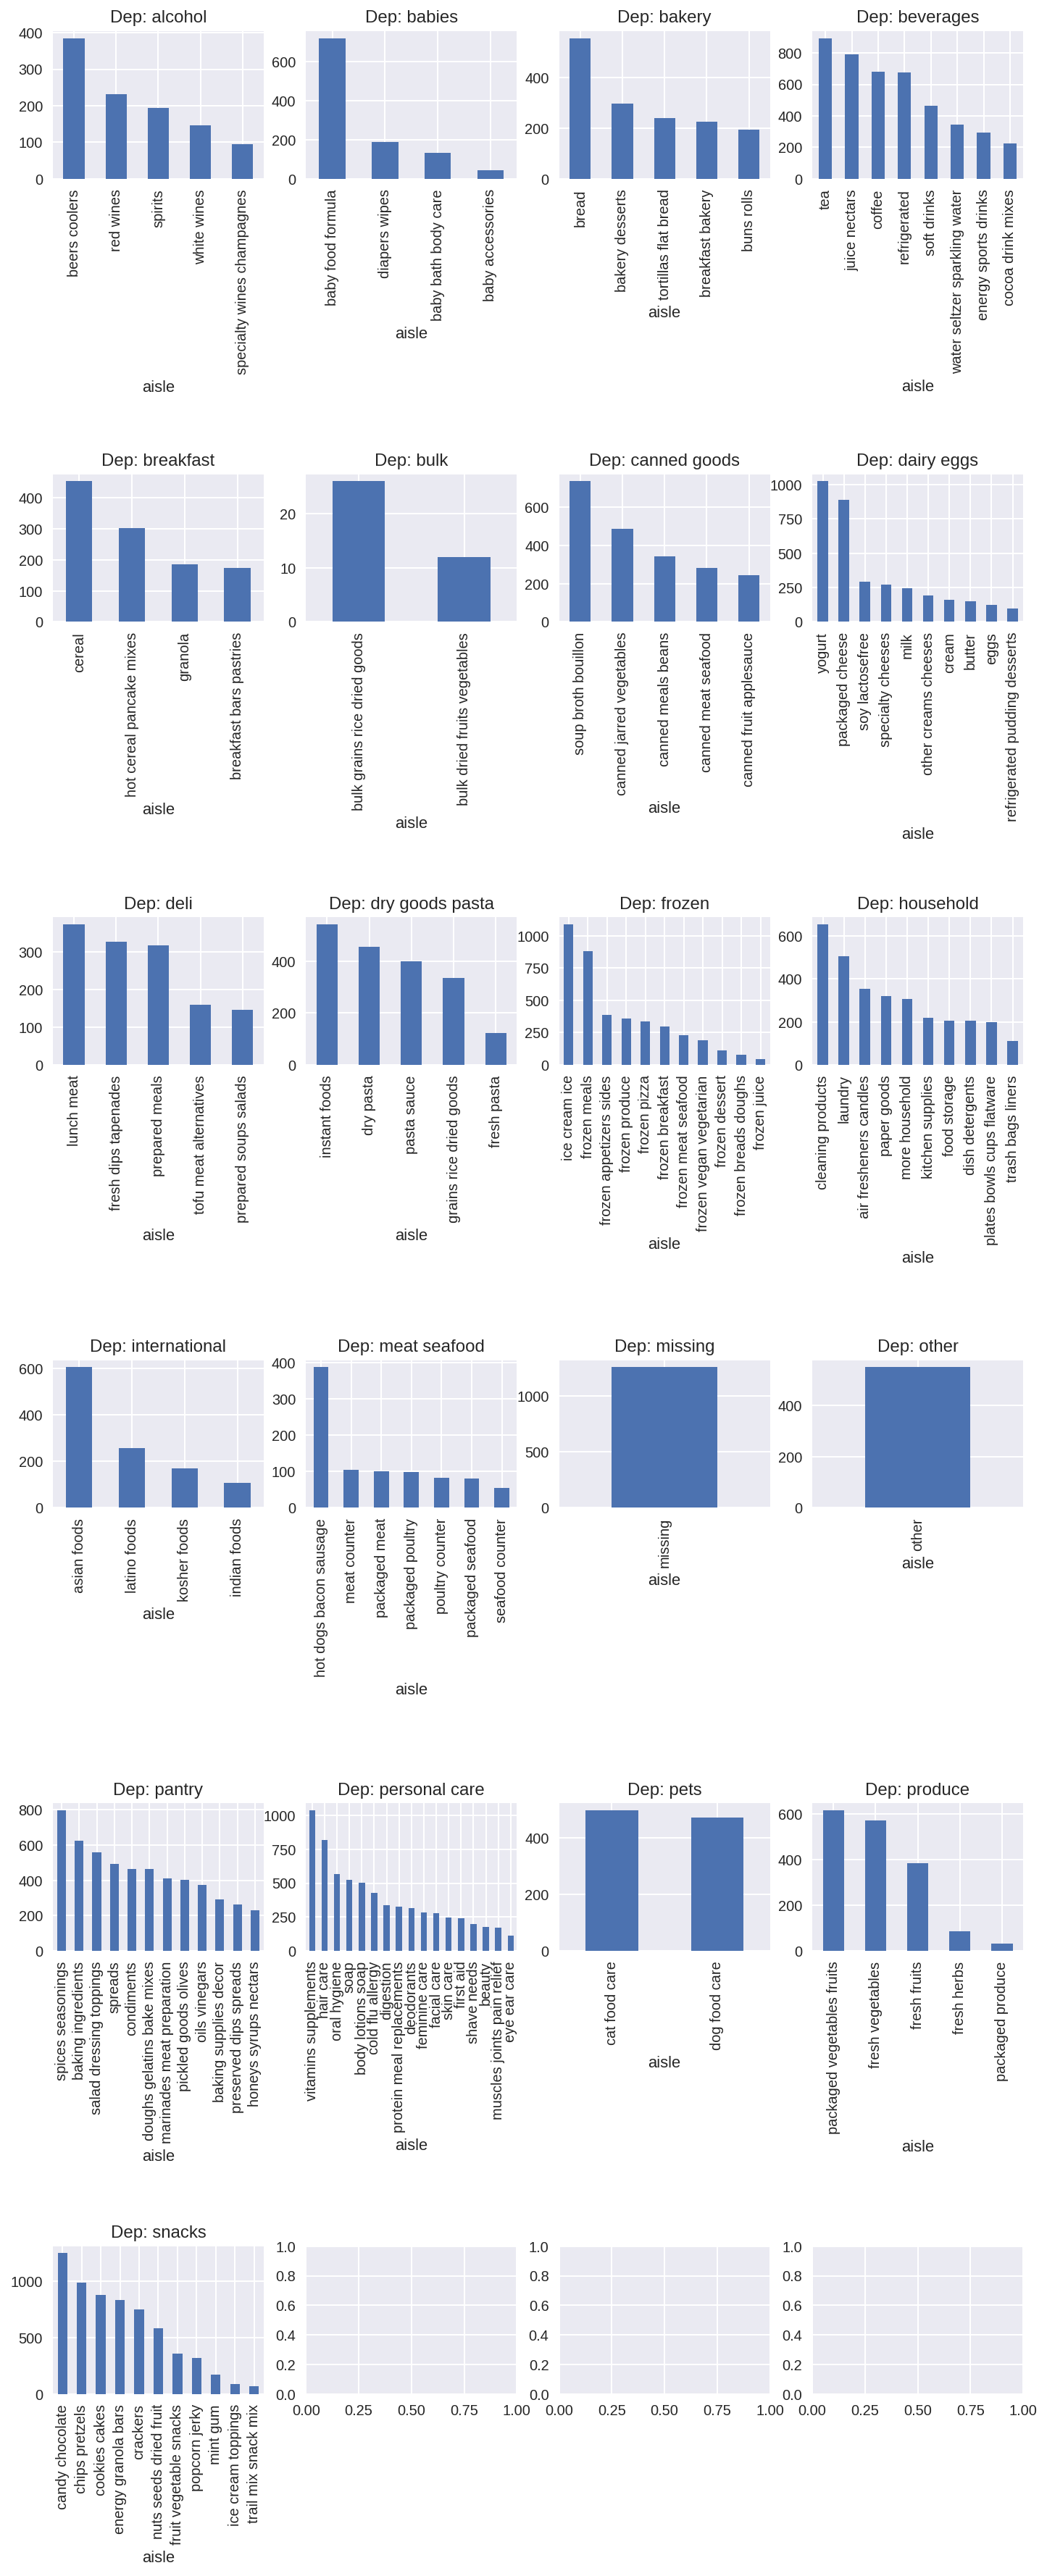

In [16]:
# basic group info (departments)

plt.figure(figsize=(24, 10))
# groupby() groups series according to department
# count() returns number of non-NA/null observations, we select product_id coloumn as it's counts will reflect unique products
# copy() makes a deep copy of current DataFrame / Series
# plot() creates a bar graph plot
goods.groupby(['department']).count()['product_id'].copy()\
.sort_values(ascending=False).plot(kind='bar', 
                                   #figsize=(12, 5), 
                                   title='Departments: Product #')


# basic group info (top-x aisles)
top_aisles_cnt = 15
plt.figure(figsize=(12, 5))
# we only look at top 15 aisle product counts
goods.groupby(['aisle']).count()['product_id']\
.sort_values(ascending=False)[:top_aisles_cnt].plot(kind='bar', 
                                   #figsize=(12, 5), 
                                   title='Aisles: Product #')

# plot departments volume, split by aisles
f, axarr = plt.subplots(6, 4, figsize=(12, 30))
# enumerate over departments in ascending order
for i,e in enumerate(departments.department.sort_values(ascending=True)):
    # access the axis object based on index and set title
    axarr[i//4, i%4].set_title('Dep: {}'.format(e))
    # plot goods grouped by all and count and assign to current axarr based on index.
    goods[goods.department==e].groupby(['aisle']).count()['product_id']\
    .sort_values(ascending=False).plot(kind='bar', ax=axarr[i//4, i%4])
f.subplots_adjust(hspace=2)

# Orders data